## Yinelenen Kayıtları Kaldırma
Tahmini süre: 30 dakika

Giriş
Bu laboratuvar çalışmasında, analiz için veri hazırlamanın önemli bir adımı olan veri düzenlemeye odaklanacaksınız. Veri düzenleme, verileri analiz için uygun hale getirmek üzere temizlemeyi ve düzenlemeyi içerir. Bu süreçteki önemli bir görev, analizi bozabilecek ve yanlış sonuçlara yol açabilecek tekrarlanan kayıtlar olan yinelenen girişleri kaldırmaktır.

Hedefler
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Veri kümesindeki yinelenen satırları belirleyin.

Yinelenen satırları kaldırmak ve kaldırmayı doğrulamak için uygun teknikler kullanın.

Eksik değerleri uygun şekilde nasıl ele alacağınızı özetleyin.
Tazminat verilerini normalleştirmek için ConvertedCompYearly'yi kullanın.

Gerekli Kütüphaneleri Kurun

In [3]:
!pip install pandas

## Gerekli Kütüphaneleri Yükleyin
Adım 1: Gerekli Kütüphaneleri İçe Aktarın

In [4]:
import pandas as pd

## Adım 2: Veri Setini Bir DataFrame'e Yükleyin
pd.read_csv() kullanarak veri setini yükleyin.

In [5]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## 3. Adım: Yinelenen Satırları Belirleme
Görev 1: Yinelenen Satırları Belirleme

1.Veri kümesindeki yinelenen satır sayısını sayın.
2.Yapılarını anlamak için ilk birkaç yinelenen satırı görüntüleyin.

In [8]:
# 1. Veri kümesindeki toplam yinelenen satır sayısını bulalım
duplicate_count = df.duplicated().sum()
print(f"Verikumesindeki toplam yinelenen satr sayısı: {duplicate_count}")

# 2. Yapılarını anlamak için ilk birkaç yinelenen satırı görüntüleyelim
# keep=False kullanarak tüm kopyaları listeliyoruz
duplicate_rows = df[df.duplicated(keep=False)]
print("\nYinelenen satırlardan ilk birkaç örnek:")
print(duplicate_rows.head())


Verikumesindeki toplam yinelenen satr sayısı: 0

Yinelenen satırlardan ilk birkaç örnek:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncW

## Adım 4: Yinelenen Satırları Kaldırma
Görev 2: Yinelenenleri Kaldırma

1. drop_duplicates() fonksiyonunu kullanarak veri kümesinden yinelenen satırları kaldırın.
2. Kaldırma işleminden sonra yinelenen satır sayısını sayarak kaldırma işlemini doğrulayın.

In [9]:
# 1. drop_duplicates() fonksiyonu ile yinelenenleri kaldıralım
# Veride 0 yinelenen olduğu için bu satır mevcut 65437 kaydı koruyacaktır.
df.drop_duplicates(inplace=True)

# 2. İşlemi doğrulamak için tekrar yinelenen sayısını kontrol edelim
remaining_duplicates = df.duplicated().sum()

print(f"Kaldırma işlemi sonrası yinelenen satır sayısı: {remaining_duplicates}")
print(f"Veri setinin son boyutu: {df.shape}")

Kaldırma işlemi sonrası yinelenen satır sayısı: 0
Veri setinin son boyutu: (65437, 114)


## Adım 5: Eksik Değerlerin Ele Alınması
Görev 3: Eksik Değerleri Belirleme ve Ele Alma

Veri kümesindeki tüm sütunlar için eksik değerleri belirleyin.
Önemli eksik değerlere sahip bir sütun seçin (örneğin, EdLevel) ve en sık görülen değerle doldurun.

In [14]:
# 1. Tüm sütunlar için eksik (null) değer sayısını belirleyelim
missing_values = df.isnull().sum()
print("Sutun bazında eksik değerlerin sayıları(ilk ilk 10): ")
print(missing_values.head(10))

# 2. 'EdLevel' sütunundaki eksik değer sayısını kontrol edelim
print(f"\n 'EdLevel' sutunundaki başlangıtaki eksik değer sayısı: {df['EdLevel'].isnull().sum()}")

# 3. 'EdLevel' için en sık görülen değeri (Mod) bulalım
# mode() fonksiyonu bir seri döndürür, bu yüzden [0] ile ilk değeri alırız.
ed_level_mode = df['EdLevel'].mode()[0]
print(f"'Edlevel' için en sık gorulen deger(Mod):  {ed_level_mode}")

# 4. Eksik değerleri bu mod değeriyle dolduralım
df['EdLevel'].fillna(ed_level_mode, inplace=True) 

#işemi dogrulayaalım
print(f"Doldurma sonrası 'Edlevel' eksik deger sayısı:  {df['EdLevel'].isnull().sum()}")

Sutun bazında eksik değerlerin sayıları(ilk ilk 10): 
ResponseId              0
MainBranch              0
Age                     0
Employment              0
RemoteWork          10631
Check                   0
CodingActivities    10971
EdLevel              4653
LearnCode            4949
LearnCodeOnline     16200
dtype: int64

 'EdLevel' sutunundaki başlangıtaki eksik değer sayısı: 4653
'Edlevel' için en sık gorulen deger(Mod):  Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Doldurma sonrası 'Edlevel' eksik deger sayısı:  0


/tmp/ipykernel_335/4234228537.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(ed_level_mode, inplace=True)


# Adım 6: Ücret Verilerinin Normalleştirilmesi
Görev 4: ConvertedCompYearly Kullanarak Ücret Verilerini Normalleştirme

1. Normalleştirilmiş yıllık ücret verileri zaten sağlandığı için,  ücret analizi için ConvertedCompYearly sütununu kullanın.
2. ConvertedCompYearly'de eksik değerler olup olmadığını kontrol edin ve gerekirse bunları işleyin.

In [18]:
# 1. ConvertedCompYearly sütununda kaç tane eksik değer olduğunu kontrol edelim
missing_comp = df['ConvertedCompYearly'].isnull().sum()
print(f"Başlangıçtaki eksik ücret verisi sayısı : {missing_comp}")

# 2. Sayısal verilerde aykırı değerlerden etkilenmemek için Medyan değerini hesaplayalım
comp_median = df['ConvertedCompYearly'].median()
print(f"Hesaplanan Medyan Ücret: {comp_median}")

# 3. Eksik değerleri hesapladığımız medyan ile dolduralım
df['ConvertedCompYearly'].fillna(comp_median, inplace=True)

# 4. İşlemi doğrulayalım
print(f"Doldurma sonrası eksik ücret verisi sayısı: {df['ConvertedCompYearly'].isnull().sum()}")


Başlangıçtaki eksik ücret verisi sayısı : 42002
Hesaplanan Medyan Ücret: 65000.0
Doldurma sonrası eksik ücret verisi sayısı: 0


/tmp/ipykernel_335/1528810617.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(comp_median, inplace=True)


# Adım 7: Özet ve Sonraki Adımlar
Bu laboratuvar çalışmasında, yinelenen satırları belirlemeye ve kaldırmaya odaklandınız.

Seçilen bir sütundaki en sık kullanılan değeri atayarak eksik değerleri ele aldınız.

Ücret normalizasyonu için ConvertedCompYearly'yi kullandınız ve eksik değerleri ele aldınız.

Daha fazla analiz için, diğer sütunları incelemeyi veya temizlenmiş veri setini görselleştirmeyi düşünün.

In [23]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 157.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 154.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 174.5 MB/s eta 0:00:00


### TEMİZLENMİŞ VERİ SETİ ÖZETİ ###
Toplam Satır Sayısı: 65437
Toplam Sütun Sayısı: 114

EdLevel Boş Değer Sayısı: 0
ConvertedCompYearly Boş Değer Sayısı: 0


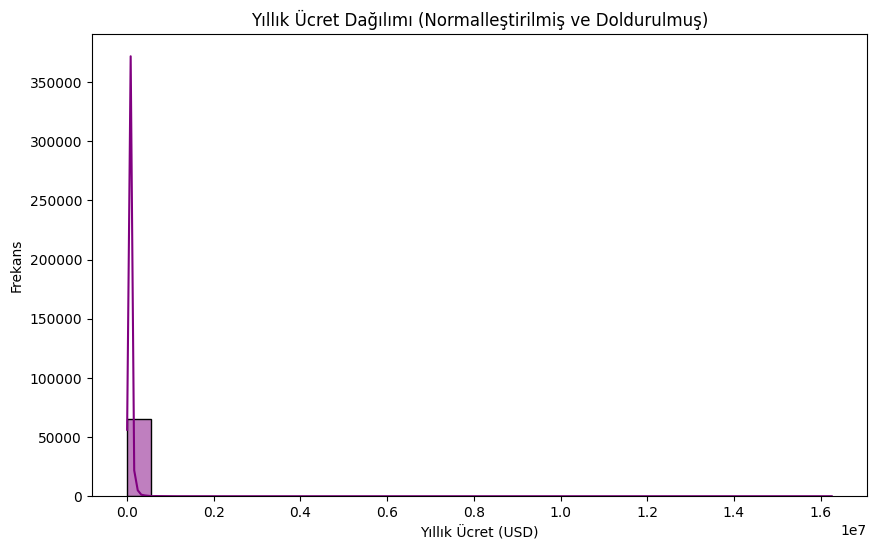

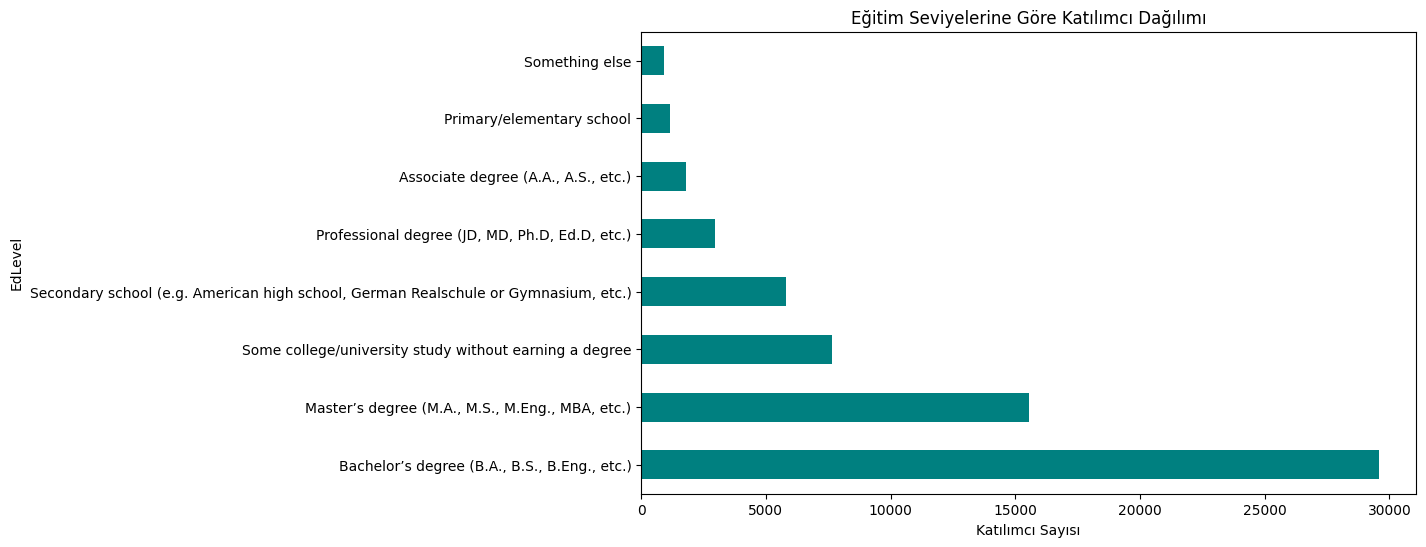

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Temizlenmiş veri setinin genel bir özetini görelim
print("### TEMİZLENMİŞ VERİ SETİ ÖZETİ ###")
print(f"Toplam Satır Sayısı: {df.shape[0]}")
print(f"Toplam Sütun Sayısı: {df.shape[1]}")

# 2. Kritik sütunlardaki eksik değerlerin kalmadığını doğrulayalım
print(f"\nEdLevel Boş Değer Sayısı: {df['EdLevel'].isnull().sum()}")
print(f"ConvertedCompYearly Boş Değer Sayısı: {df['ConvertedCompYearly'].isnull().sum()}")

# 3. Temizlediğimiz Maaş Verisinin Dağılımını Görselleştirelim
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color='purple')
plt.title('Yıllık Ücret Dağılımı (Normalleştirilmiş ve Doldurulmuş)')
plt.xlabel('Yıllık Ücret (USD)')
plt.ylabel('Frekans')
plt.show()

# 4. Eğitim Seviyelerine Göre Katılım Dağılımı
plt.figure(figsize=(10, 6))
df['EdLevel'].value_counts().plot(kind='barh', color='teal')
plt.title('Eğitim Seviyelerine Göre Katılımcı Dağılımı')
plt.xlabel('Katılımcı Sayısı')
plt.show()